In [248]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [249]:
df = pd.read_csv('data/bitcoin_price_Training - Training.csv')

In [250]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [251]:
df.describe()

,Open,High,Low,Close
count,1556.000000,1556.000000,1556.000000,1556.000000
mean,582.625328,597.992847,567.851446,584.239396
std,523.137312,542.992855,505.877401,525.904442
min,68.500000,74.560000,65.530000,68.430000
25%,254.287500,260.327500,248.835000,254.320000
50%,438.600000,447.560000,430.570000,438.855000
75%,662.437500,674.525000,646.735000,663.402500
max,2953.220000,2999.910000,2840.530000,2958.110000


In [252]:
df.dtypes

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume         object
Market Cap     object
dtype: object

In [253]:
df['Date'] = pd.to_datetime(df.Date)

In [254]:
df.set_index('Date', inplace=True)

In [255]:
df.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [256]:
df.tail()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"


In [257]:
# eda

In [258]:
data = df.copy()

<Axes: xlabel='Date'>

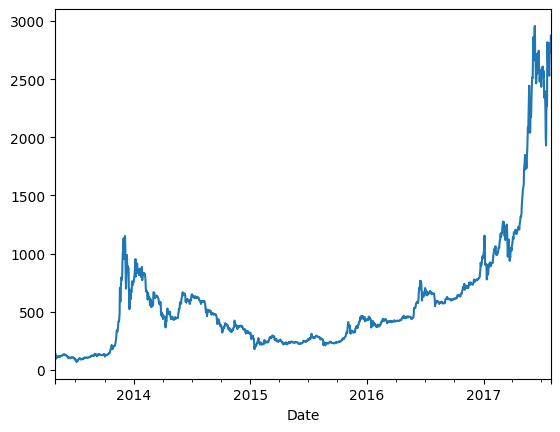

In [259]:
data.Close.plot()

In [260]:
# objective: predict the closing price

In [261]:
y = data.Close

In [262]:
y

Date
2017-07-31    2875.34
2017-07-30    2757.18
2017-07-29    2726.45
2017-07-28    2809.01
2017-07-27    2671.78
               ...   
2013-05-02     105.21
2013-05-01     116.99
2013-04-30     139.00
2013-04-29     144.54
2013-04-28     134.21
Name: Close, Length: 1556, dtype: float64

In [263]:
y.resample('W').sum()

Date
2013-04-28      134.21
2013-05-05      831.90
2013-05-12      797.48
2013-05-19      830.97
2013-05-26      894.13
                ...   
2017-07-09    17984.69
2017-07-16    15629.11
2017-07-23    17846.60
2017-07-30    18825.21
2017-08-06     2875.34
Freq: W-SUN, Name: Close, Length: 224, dtype: float64

<Axes: xlabel='Date'>

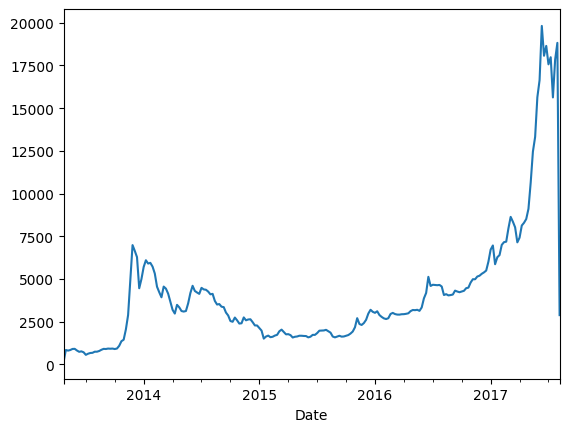

In [264]:
y.resample('W').sum().plot()

In [265]:
y.groupby(y.index.year).mean()

Date
2013     257.474476
2014     527.236658
2015     272.453260
2016     568.492131
2017    1628.622123
Name: Close, dtype: float64

<Axes: xlabel='Date'>

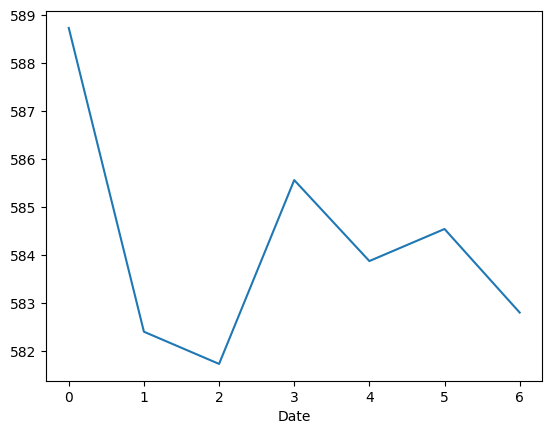

In [266]:
y.groupby(y.index.weekday).mean().plot()

In [267]:
# analysing mean close price daily

In [268]:
y.index.dayofyear

Index([212, 211, 210, 209, 208, 207, 206, 205, 204, 203,
       ...
       127, 126, 125, 124, 123, 122, 121, 120, 119, 118],
      dtype='int32', name='Date', length=1556)

<Axes: xlabel='Date'>

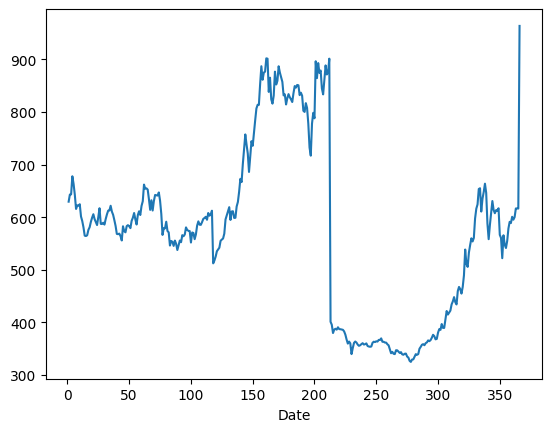

In [269]:
y.groupby(y.index.dayofyear).mean().plot()

In [270]:
# analysing trend of closing price in each and every quarter

In [271]:
y.index.quarter

Index([3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       ...
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype='int32', name='Date', length=1556)

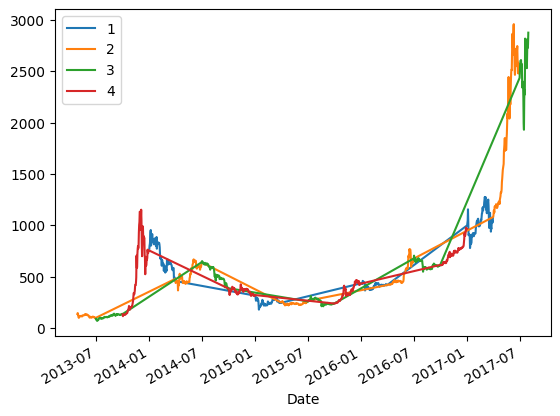

In [272]:
y.groupby(y.index.quarter).plot()
plt.legend()

In [273]:
# analysing trend of closing price in weekdays and weekends

In [274]:
data['dayofweek'] = data.index.dayofweek

In [275]:
data['weekstatus'] = data['dayofweek'].apply(lambda feature: 'weekday' if feature < 5 else 'weekend')
# using lambda, we make a function that request 'feature' input which return 'weekdays' if 'feature less than 5, and return 'weekends' if condition does not meet

In [276]:
data

,Open,High,Low,Close,Volume,Market Cap,dayofweek,weekstatus
Date,,,,,,,,
2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000",0,weekday
2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000",6,weekend
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000",5,weekend
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000",4,weekday
2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000",3,weekday
...,...,...,...,...,...,...,...,...
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000",3,weekday
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000",2,weekday
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000",1,weekday


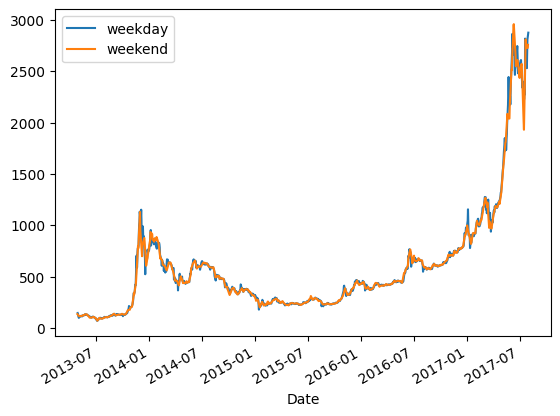

In [277]:
data[data.weekstatus == 'weekday'].Close.plot(label='weekday')
data[data.weekstatus == 'weekend'].Close.plot(label='weekend')
plt.legend()

In [278]:
# forecasting

In [279]:
# using baseline model (previous value is the best predictor for the next occurence)

In [280]:
data['baselinepred'] = data.Close.shift(1)

<Axes: xlabel='Date'>

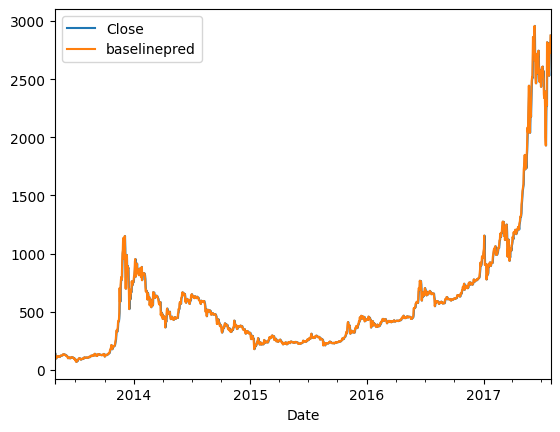

In [281]:
data[['Close', 'baselinepred']].plot()

In [282]:
from sklearn.metrics import mean_squared_error

In [283]:
np.sqrt(mean_squared_error(data.Close[1:], data.baselinepred[1:]))

37.23363264835875

In [284]:
# examine whether it contains seasonality trend noise

<Axes: xlabel='Date'>

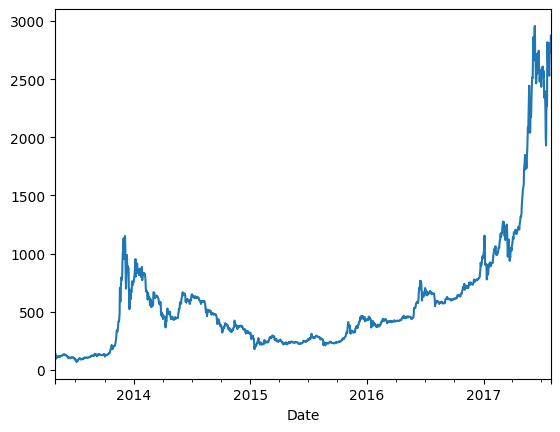

In [285]:
y.plot()

In [286]:
mean = y.rolling(window=7).mean()

In [287]:
std = y.rolling(window=7).std()

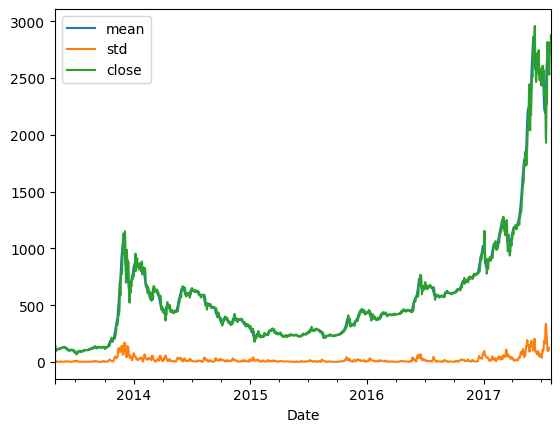

In [288]:
mean.plot(label='mean')
std.plot(label='std')
y.plot(label='close')
plt.legend()

In [289]:
from statsmodels.tsa.stattools import adfuller

In [290]:
adfuller(y)

(-4.477989431941971,
 0.00021545351558762077,
 24,
 1531,
 {'1%': -3.4346284441307184,
  '5%': -2.863429668579316,
  '10%': -2.5677760318409732},
 14821.384786923289)

In [291]:
labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
for value, label in zip(adfuller(y), labels):
    print('{}: {}'. format(label, value))

ADF Test Statistic: -4.477989431941971
p-value: 0.00021545351558762077
#Lags Used: 24
Number of Observations Used: 1531


In [292]:
def plot_stationery(y):
    mean = y.rolling(window=7).mean()
    std = y.rolling(window=7).std()

    plt.figure(figsize=(15,6))
    mean.plot(label='mean')
    std.plot(label='std')
    y.plot(label='close')
    plt.legend()

    res = adfuller(y)

    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value, label in zip(res, labels):
        print('{}: {}'. format(label, value))
    if res[1] <= 0.05:
        print('data is stationary')
    else:
        print('data is not stationary')
    

ADF Test Statistic: -4.477989431941971
p-value: 0.00021545351558762077
#Lags Used: 24
Number of Observations Used: 1531
data is stationary


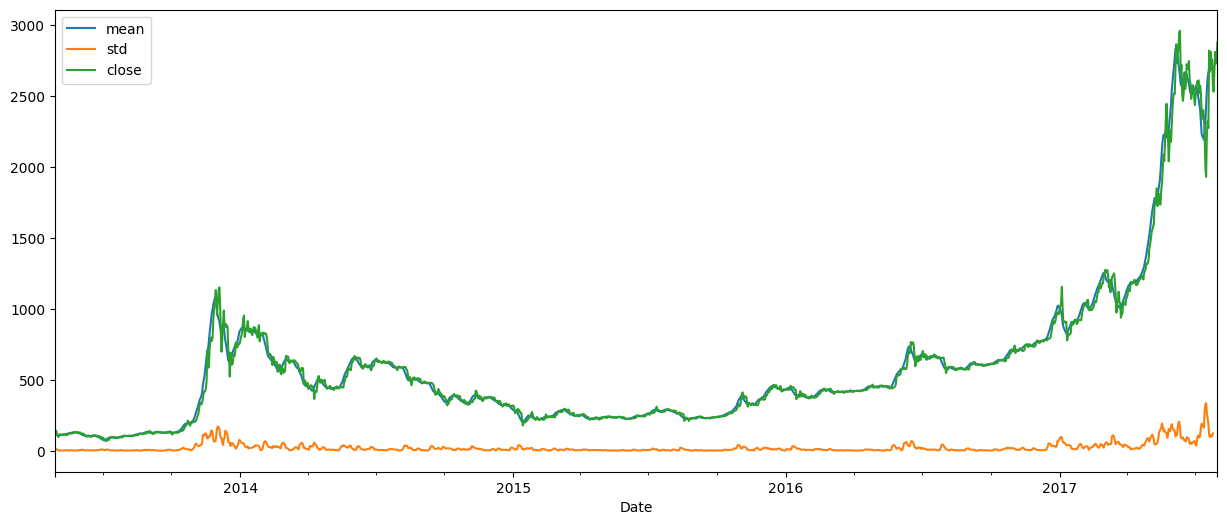

In [293]:
plot_stationery(y)

In [294]:
# p value is less than 0.05, so the data is stationary

In [295]:
# eliminating trend on the data

<Axes: xlabel='Date'>

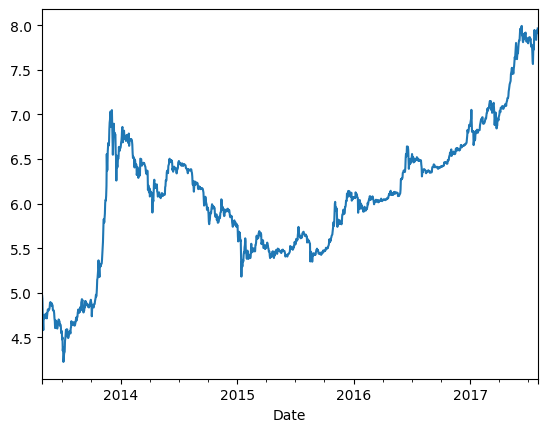

In [296]:
log_transform = np.log(y)
log_transform.plot()

In [297]:
# seasonality adjustment by rolling window

In [298]:
rolling_avg = log_transform.rolling(window=7).mean()

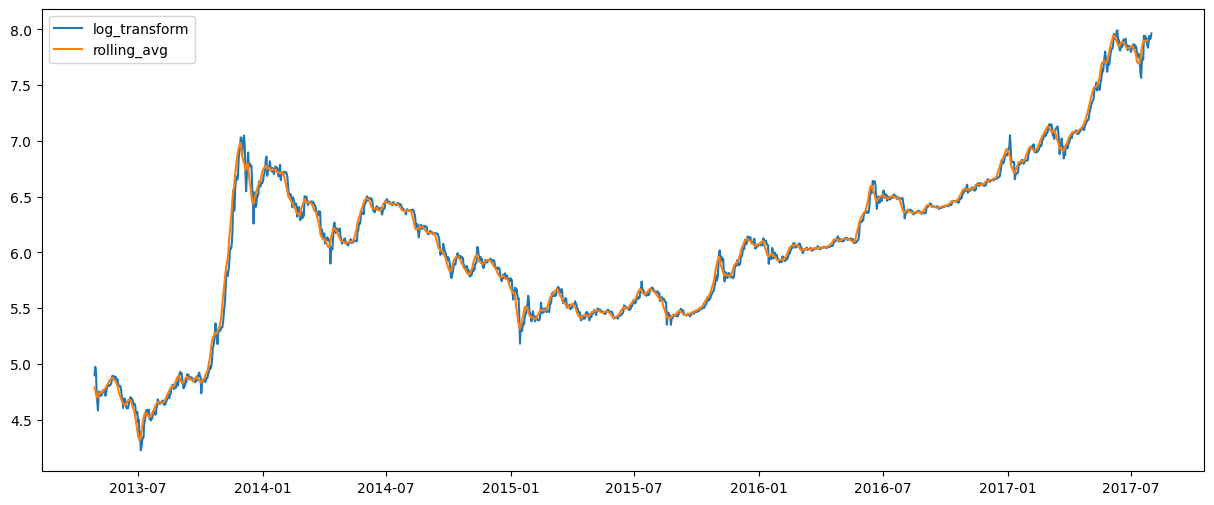

In [299]:
plt.figure(figsize=(15,6))
plt.plot(log_transform, label='log_transform')
plt.plot(rolling_avg, label='rolling_avg')
plt.legend()

In [300]:
lr_diff = log_transform - rolling_avg

In [301]:
lr_diff

Date
2017-07-31         NaN
2017-07-30         NaN
2017-07-29         NaN
2017-07-28         NaN
2017-07-27         NaN
                ...   
2013-05-02   -0.041435
2013-05-01    0.060456
2013-04-30    0.201349
2013-04-29    0.204377
2013-04-28    0.109284
Name: Close, Length: 1556, dtype: float64

ADF Test Statistic: -7.188887202324558
p-value: 2.5340955586099357e-10
#Lags Used: 22
Number of Observations Used: 1527
data is stationary


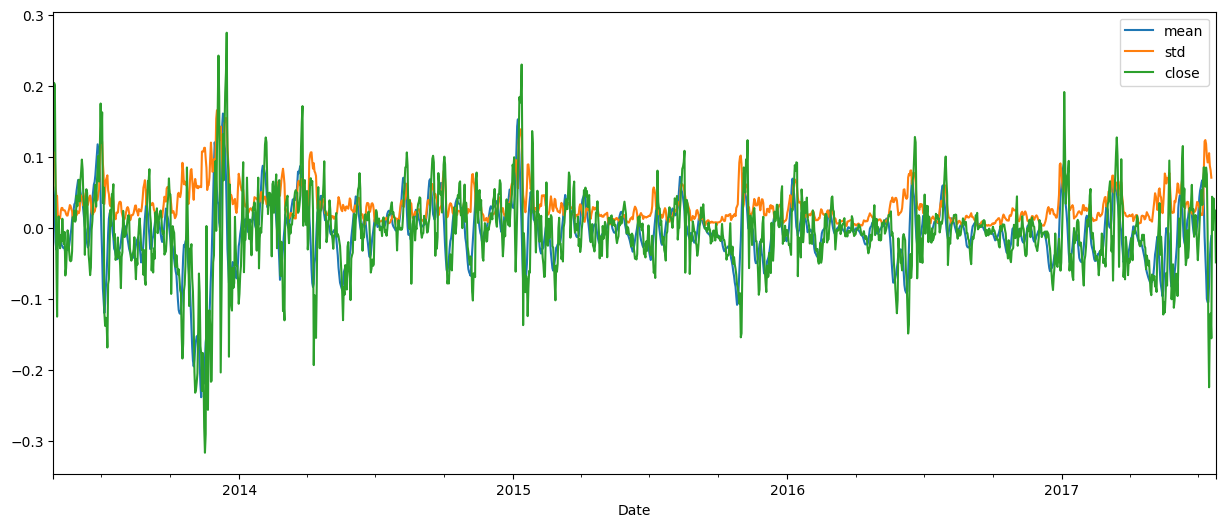

In [302]:
plot_stationery(lr_diff.dropna())

In [303]:
# seasonality adjustment by differencing

In [304]:
log_shift = log_transform - log_transform.shift(7)
log_shift

Date
2017-07-31         NaN
2017-07-30         NaN
2017-07-29         NaN
2017-07-28         NaN
2017-07-27         NaN
                ...   
2013-05-02   -0.068505
2013-05-01    0.029669
2013-04-30    0.220449
2013-04-29    0.252382
2013-04-28    0.146592
Name: Close, Length: 1556, dtype: float64

<Axes: xlabel='Date'>

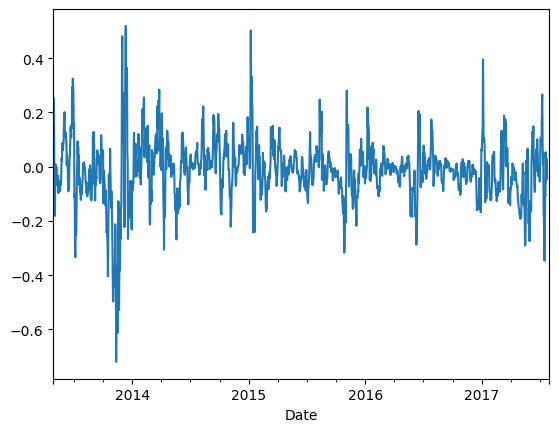

In [305]:
log_shift.plot()

ADF Test Statistic: -6.511722596316719
p-value: 1.0961860829580157e-08
#Lags Used: 23
Number of Observations Used: 1525
data is stationary


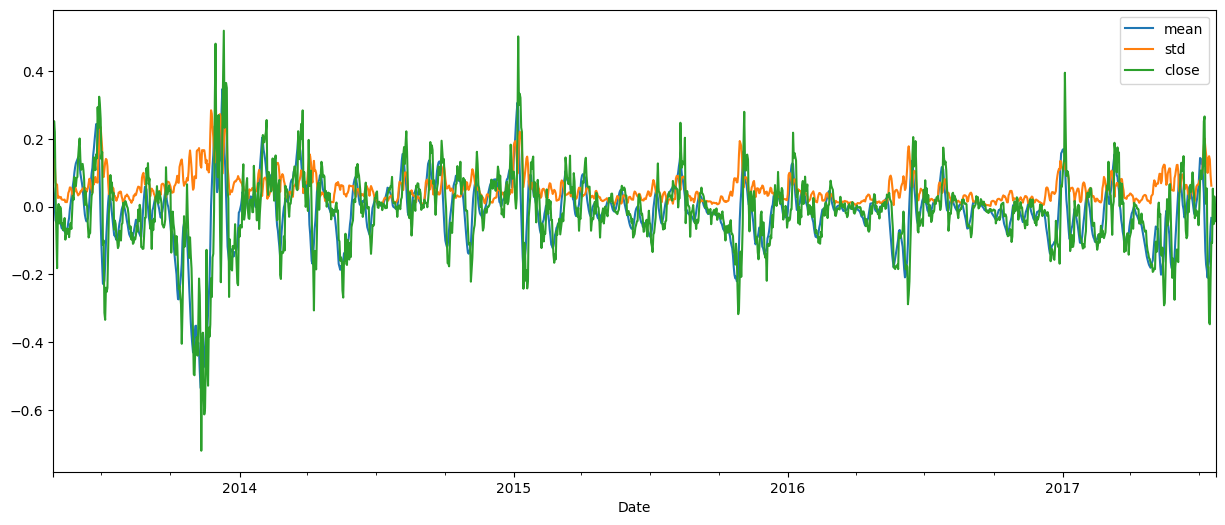

In [306]:
plot_stationery(log_shift.dropna())

In [307]:
# forecasting

In [308]:
from prophet import Prophet

In [309]:
df_prophet = y.reset_index()

In [310]:
df_prophet.columns = ['ds', 'y']

In [314]:
model = Prophet()
model.fit(df_prophet)

13:50:35 - cmdstanpy - INFO - Chain [1] start processing
13:50:36 - cmdstanpy - INFO - Chain [1] done processing


In [317]:
future_df = model.make_future_dataframe(periods=500, freq='D')

In [318]:
future_df

,ds
0,2013-04-28
1,2013-04-29
2,2013-04-30
3,2013-05-01
4,2013-05-02
...,...
2051,2018-12-09
2052,2018-12-10
2053,2018-12-11
2054,2018-12-12


In [319]:
pred = model.predict(future_df)

In [320]:
pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-04-28,75.668158,-220.890127,59.217938,75.668158,75.668158,-155.702090,-155.702090,-155.702090,-2.733131,-2.733131,-2.733131,-152.968959,-152.968959,-152.968959,0.0,0.0,0.0,-80.033932
1,2013-04-29,73.564780,-208.922134,66.844516,73.564780,73.564780,-145.082098,-145.082098,-145.082098,1.467342,1.467342,1.467342,-146.549440,-146.549440,-146.549440,0.0,0.0,0.0,-71.517318
2,2013-04-30,71.461402,-197.871069,71.231900,71.461402,71.461402,-137.664186,-137.664186,-137.664186,2.473341,2.473341,2.473341,-140.137527,-140.137527,-140.137527,0.0,0.0,0.0,-66.202784
3,2013-05-01,69.358024,-202.310819,75.363476,69.358024,69.358024,-133.646489,-133.646489,-133.646489,0.064176,0.064176,0.064176,-133.710665,-133.710665,-133.710665,0.0,0.0,0.0,-64.288464
4,2013-05-02,67.254646,-188.615722,81.526337,67.254646,67.254646,-125.061137,-125.061137,-125.061137,2.181269,2.181269,2.181269,-127.242406,-127.242406,-127.242406,0.0,0.0,0.0,-57.806490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2051,2018-12-09,5569.299758,3035.895351,8151.937873,2998.467552,8101.883737,25.774734,25.774734,25.774734,-2.733131,-2.733131,-2.733131,28.507865,28.507865,28.507865,0.0,0.0,0.0,5595.074492
2052,2018-12-10,5575.742525,3024.521594,8127.616144,2992.299907,8116.119090,23.315640,23.315640,23.315640,1.467342,1.467342,1.467342,21.848298,21.848298,21.848298,0.0,0.0,0.0,5599.058165
2053,2018-12-11,5582.185291,3079.291986,8153.427371,2986.132262,8130.206653,17.498867,17.498867,17.498867,2.473341,2.473341,2.473341,15.025526,15.025526,15.025526,0.0,0.0,0.0,5599.684158
2054,2018-12-12,5588.628058,3001.570889,8166.160857,2979.964617,8144.294216,8.191580,8.191580,8.191580,0.064176,0.064176,0.064176,8.127404,8.127404,8.127404,0.0,0.0,0.0,5596.819638


In [321]:
pred.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2051,2018-12-09,5569.299758,3035.895351,8151.937873,2998.467552,8101.883737,25.774734,25.774734,25.774734,-2.733131,-2.733131,-2.733131,28.507865,28.507865,28.507865,0.0,0.0,0.0,5595.074492
2052,2018-12-10,5575.742525,3024.521594,8127.616144,2992.299907,8116.119090,23.315640,23.315640,23.315640,1.467342,1.467342,1.467342,21.848298,21.848298,21.848298,0.0,0.0,0.0,5599.058165
2053,2018-12-11,5582.185291,3079.291986,8153.427371,2986.132262,8130.206653,17.498867,17.498867,17.498867,2.473341,2.473341,2.473341,15.025526,15.025526,15.025526,0.0,0.0,0.0,5599.684158
2054,2018-12-12,5588.628058,3001.570889,8166.160857,2979.964617,8144.294216,8.191580,8.191580,8.191580,0.064176,0.064176,0.064176,8.127404,8.127404,8.127404,0.0,0.0,0.0,5596.819638
2055,2018-12-13,5595.070824,3013.345129,8155.252532,2973.844453,8158.381778,3.419775,3.419775,3.419775,2.181269,2.181269,2.181269,1.238506,1.238506,1.238506,0.0,0.0,0.0,5598.490599


In [322]:
# plotting pred

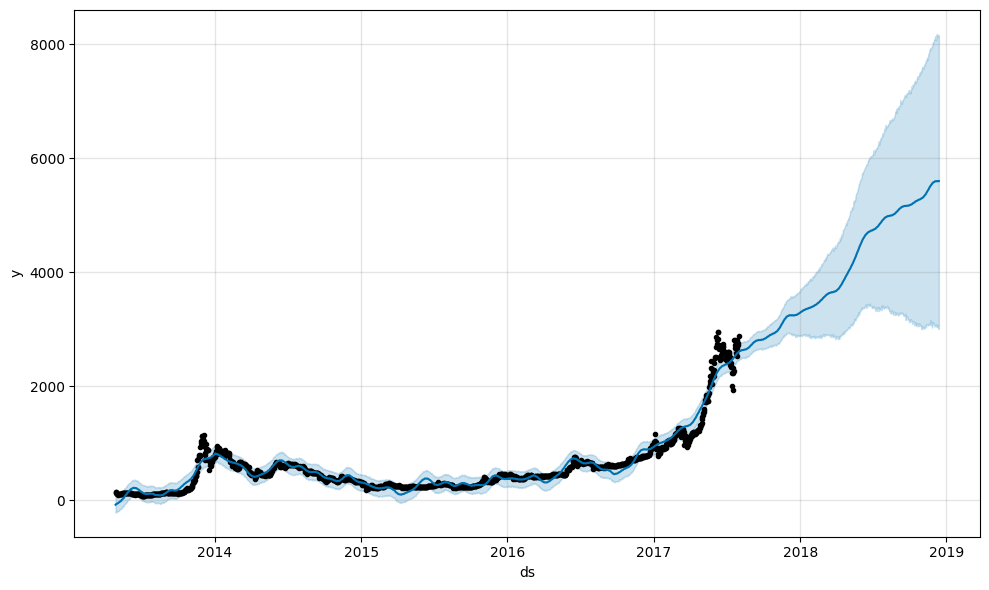

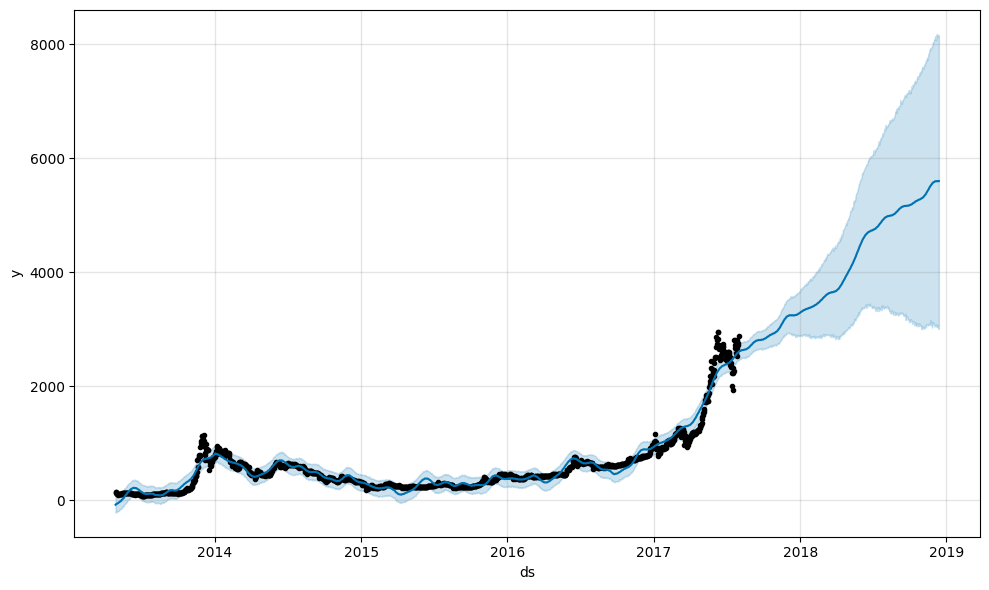

In [323]:
model.plot(pred)

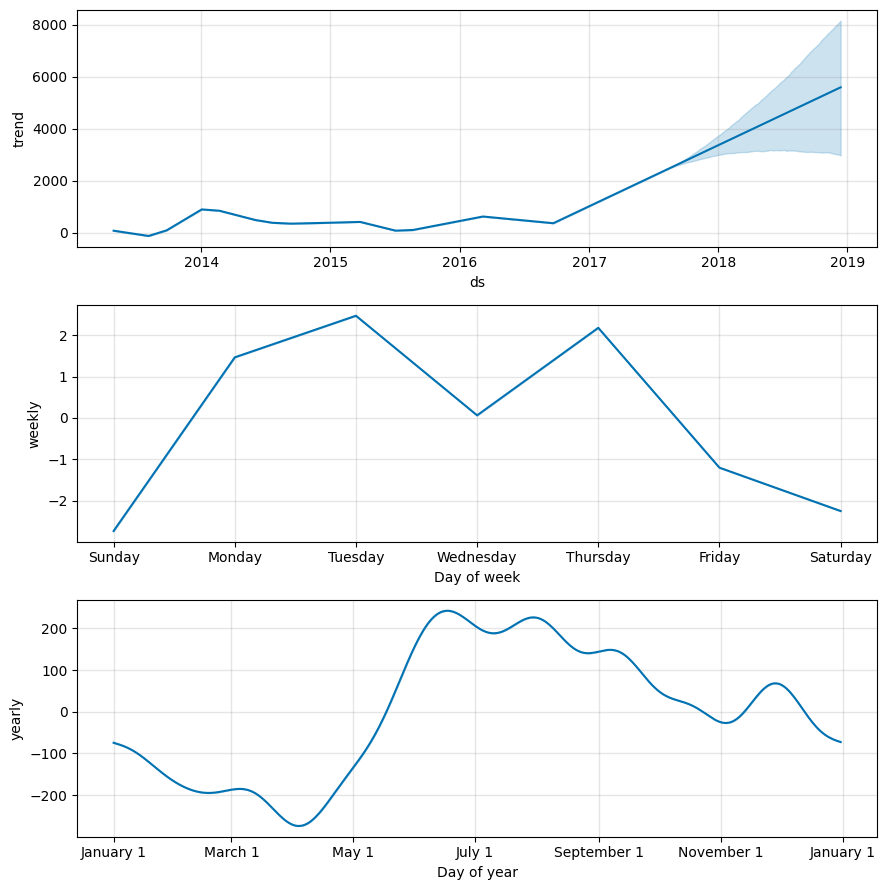

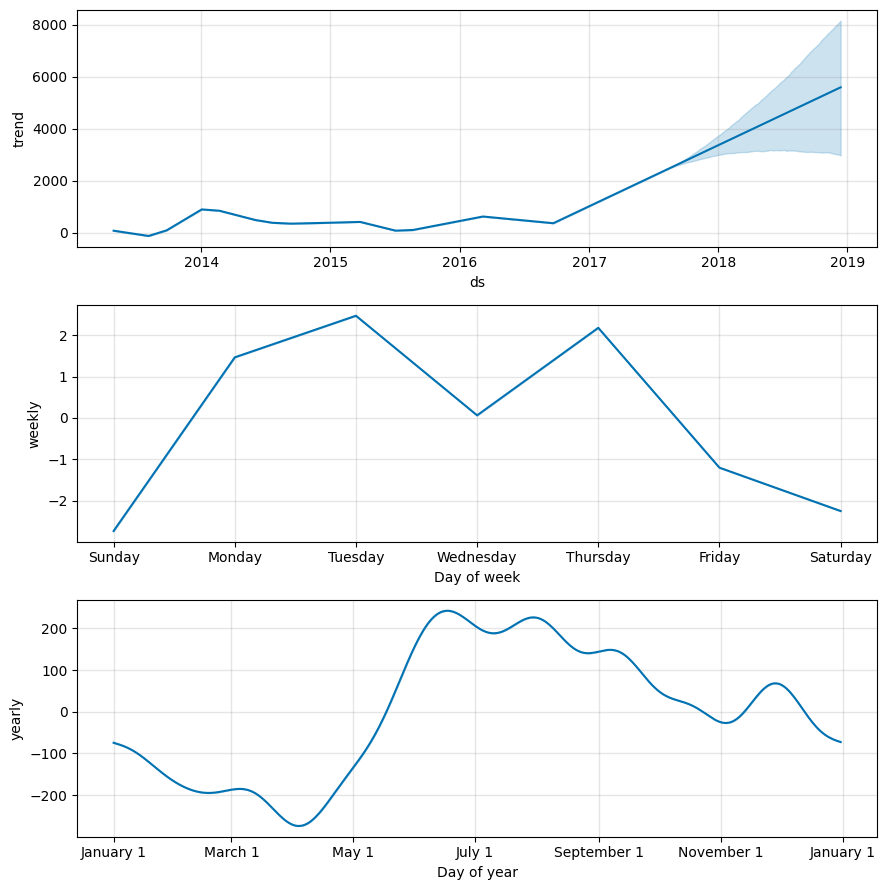

In [326]:
model.plot_components(pred)

In [327]:
# doing cross validation

In [329]:
df_prophet.shape

(1556, 2)

In [330]:
from prophet.diagnostics import cross_validation

In [331]:
df_cv = cross_validation(model, horizon='365 days', period='180 days', initial='1095 days')

  0%|          | 0/1 [00:00<?, ?it/s]

13:54:47 - cmdstanpy - INFO - Chain [1] start processing
13:54:47 - cmdstanpy - INFO - Chain [1] done processing


In [332]:
df_cv.shape

(365, 6)

In [333]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2016-08-01,687.105807,597.483939,765.613742,606.27,2016-07-31
1,2016-08-02,688.353414,604.520449,772.129325,547.47,2016-07-31
2,2016-08-03,687.712084,606.118711,769.949805,566.36,2016-07-31
3,2016-08-04,688.536698,601.089929,768.846669,578.29,2016-07-31
4,2016-08-05,688.722211,602.449116,765.134848,575.04,2016-07-31


In [334]:
from prophet.plot import plot_cross_validation_metric

c:\Users\modern14\VSCode\GitHub\my-portfolio\.venv\Lib\site-packages\prophet\plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
c:\Users\modern14\VSCode\GitHub\my-portfolio\.venv\Lib\site-packages\prophet\plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


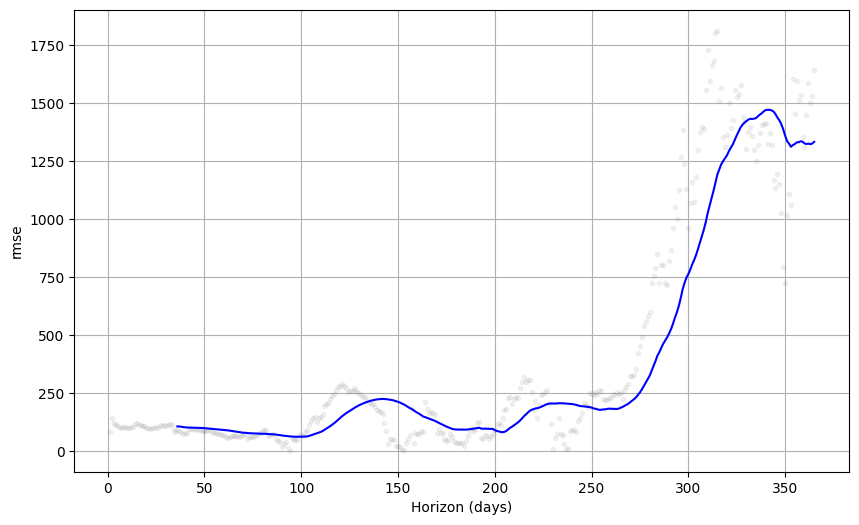

In [335]:
fig = plot_cross_validation_metric(df_cv, metric='rmse')

c:\Users\modern14\VSCode\GitHub\my-portfolio\.venv\Lib\site-packages\prophet\plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
c:\Users\modern14\VSCode\GitHub\my-portfolio\.venv\Lib\site-packages\prophet\plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


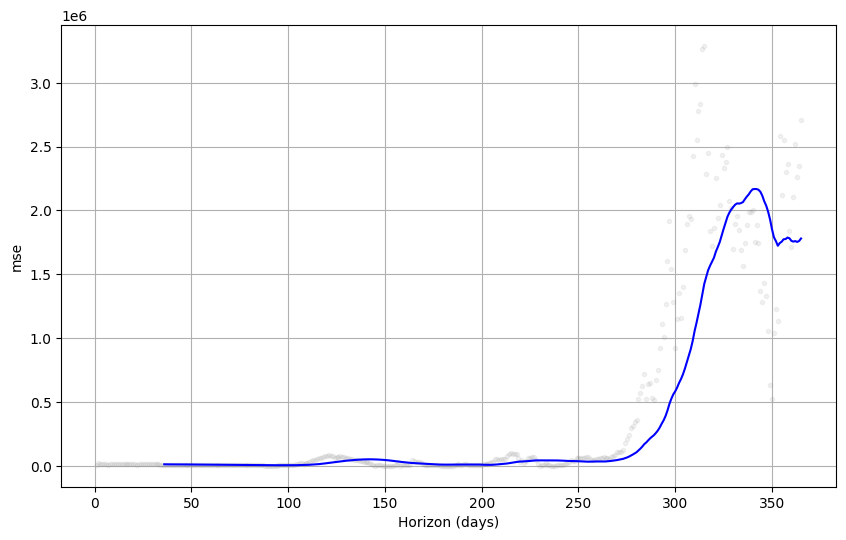

In [336]:
fig = plot_cross_validation_metric(df_cv, metric='mse')